# COGS 108 - Analysis on Global Happiness Scores and COVID-19 Variables

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ X ] YES - make available
* [  ] NO - keep private

# Overview

The onslaught of the COVID-19 pandemic in 2020 has been a mental hazard for people worldwide. With our analysis, we focus on measuring the relationship between happiness scores and COVID-related variables such as lockdown levels, vaccination progress, and COVID-related tweets. Our resulting analysis has shown that vaccination progress, lockdown levels, and freedom scores have a significant relationship with happiness levels. Conversely, COVID-related tweets have shown shocking results and do not have significant association with happiness scores.

# Names

- Jonathan Lum
- Chloe Lee
- Vivian Cheung
- Jenna Nguyen

<a id='research_question'></a>
# Research Question

Is there a relationship between world happiness (by country) and COVID-19 related factors, such as vaccination progress, the polarity of COVID-related tweets, and the length of COVID lockdowns?

<a id='background'></a>

## Background & Prior Work

It is evident that the COVID-19 pandemic has taken a toll on people’s lives worldwide. However, now that cases are at an all-time low and things are seemingly returning to normal, we wonder if people are, on average, happier or not. According to a study conducted by IZA World of Labor, COVID’s impact on the general population is dependent on their lives pre-pandemic. For instance, someone who might have gotten laid off from their job due to COVID would experience a decrease in mental health as opposed to someone who escapes from a bad marriage, who would experience an increase [^cheong]. This piqued our interest since there are surely different accounts of whether people enjoyed social isolation or not. Furthermore, we want to discover the source of why people worldwide share these sentiments. A PLOS ONE research article shows how researchers use regression analysis to determine the factors that contributed to New Zealand’s fluctuations in nationwide happiness, such as employment and mobility [^rossouw]. 

We decided to look more into the relationship between world happiness and COVID-related factors, such as the lockdown type, the number of tweets, and vaccination progress by country. This gives us a well-rounded research question that targets different aspects of people’s lives that may drive the happiness ratings.

[^cheong]: Cheong, Terence C., et al. “The Impact of a COVID-19 Lockdown on Happiness.” IZA World of Labor - Home, 9 Nov. 2020, https://wol.iza.org/opinions/the-impact-of-a-covid-19-lockdown-on-happiness. 
[^rossouw]: Rossouw, Stephanie, et al. “The Evolution of Happiness Pre and Peri-Covid-19: A Markov Switching Dynamic Regression Model.” PLOS ONE, Public Library of Science, https://journals.plos.org/plosone/article?id=10.1371%2Fjournal.pone.0259579.


# Hypothesis


We hypothesize that countries with greater vaccination progress will have higher happiness ratings due to a greater solace in a diminished COVID-19 transmission rate. In addition, we predict that countries with more positive COVID-related tweets will have higher happiness scores. Our tweet prediction is pretty commonsensical and is based on the expectation that happier countries will be led by governments that would be able to handle COVID better. Similarly, our lockdown prediction is tied very closely to expectations for how a government is perceived by their civilians. Hence, we expect those with stricter lockdowns to have lower freedom and happiness scores, while those with looser lockdowns to have higher freedom and happiness scores.

# Dataset(s)

**Dataset Name:** World Happiness Report  
**Link to the dataset:** https://www.kaggle.com/code/kristantotanusdjaja/world-happiness-report/notebook  
**Number of observations:** 1228 rows x 12 columns  
**Description of the dataset:** This dataset contains information about countries' reported happiness based on factors such as `Freedom`, `GDP`, and `Trust` in the Government over the years 2015-2022. We will use this to see how big of an impact COVID-19 had on happiness.

**Dataset Name:** COVID19 Tweets  
**Link to the dataset:** https://www.kaggle.com/datasets/gpreda/covid19-tweets  
**Number of observations:** 179108 rows x 13 columns  
**Description of the dataset:** This dataset compiles tweets that have the #covid19 hashtag starting from 7/25/2020 and onwards. Important variables include the `user location`, `date`, and `text` of the tweet.

**Dataset Name:** World Cities Datasets  
**Link to the dataset:** https://www.kaggle.com/datasets/viswanathanc/world-cities-datasets  
**Number of observations:** 13504 rows x 11 columns  
**Description of the dataset:** This dataset contains details of around 13k cities around the world, including the population, primary capital, longitude and latitude, etc. It will be used in this notebook to clean the `COVID19 Tweets` dataset and link the user locations to their respective cities. 


**Dataset Name:** COVID-19 Lockdown dates by country  
**Link to the dataset:** https://www.kaggle.com/datasets/jcyzag/covid19-lockdown-dates-by-country  
**Number of observations:** 200 rows x 4 columns  
**Description of the dataset:** This dataset compiles information about countries that enforced a lockdown on citizens at the beginning of the COVID-19 pandemic. It displays the date the lockdowns started and whether it was a full or partial lockdown, if any.

**Dataset Name:** COVID19 Country Vaccination Progress  
**Link to the dataset:** https://www.kaggle.com/code/dabawse/visualising-covid-19-vaccinations  
**Number of observations:** 9576 rows x 15 columns  
**Description of the dataset:** This dataset shows the vaccination progress of countries around the world between December 2020 to April 2021. Important variables within this dataset include `total vaccinations` for each country and the `total percent` of individuals vaccinated in a country.

We plan to combine these datasets by cross-referencing countries and attributing different factors to the impact of COVID-19 on world happiness.

# Setup

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np

# for visualizing data
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

# for data analysis of our visualizations
import patsy
import statsmodels.api as sm

# for sentiment analysis
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('vader_lexicon')

import re
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/viviancheung/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/viviancheung/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### Import Datasets

In [2]:
#importing files
happiness = pd.read_csv('data/world_happiness_report.csv')
tweets = pd.read_csv('data/covid19_tweets.csv')
cities = pd.read_csv('data/worldcities.csv')
lockdown = pd.read_csv('data/countryLockdowndatesJHUMatch.csv')
vaccinations = pd.read_csv('data/country_vaccinations.csv')

# Data Cleaning

### First, we clean the world happiness dataset.

We dropped unnecessary columns and kept: `Country`, `Region`, `Happiness Rank`, `Happiness Score`, `Economy`, `Freedom`, `Trust`, and `Year`. First, the country and region are useful to cross reference the location of interest with our other datasets such as `COVID tweets`, `vaccinations`, and `lockdown dates`. From there we are able to identify the measures of happiness; we kept the economy, freedom, and trust as factors to keep in mind for if those have a relevant trend or affect on happiness rather than the impact of COVID itself.

In [3]:
#viewing columns
happiness.columns

#narrowing down the columns we want to focus on
happiness = happiness[['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)',
         'Freedom', 'Trust (Government Corruption)', 'Year']]

We drop the dates prior to 2019 since COVID did not happen until March 2020. We kept 2019 to have reference to the general trend of happiness prior to the event/peak of COVID-- and are able to compare it to the conception, and the ongoing/everchanging pandemic.

In [4]:
#removing data from years before 2019
happiness = happiness[happiness['Year'] >= 2019]

Here there was an error in the dataset where they used commas instead of decimals.

In [5]:
#cleaning data to conform to 
happiness['Country'] = happiness['Country'].astype(str).str.lower()
happiness['Freedom'] = happiness['Freedom'].str.replace(',','.').astype(float)
happiness['Trust (Government Corruption)'] = happiness['Trust (Government Corruption)'].str.replace(',','.').astype(float)
happiness['Economy (GDP per Capita)'] = happiness['Economy (GDP per Capita)'].str.replace(',','.').astype(float)
happiness['Happiness Score'] = happiness['Happiness Score'].str.replace(',','.').astype(float)

Here we are resetting the index to only have our desired values.

In [6]:
happiness = happiness.reset_index()
happiness

,index,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Freedom,Trust (Government Corruption),Year
0,625,finland,Western Europe,1,7.769,1.340,0.596,0.393,2019
1,626,denmark,Western Europe,2,7.600,1.383,0.592,0.410,2019
2,627,norway,Western Europe,3,7.554,1.488,0.603,0.341,2019
3,628,iceland,Western Europe,4,7.494,1.380,0.591,0.118,2019
4,629,netherlands,Western Europe,5,7.488,1.396,0.557,0.298,2019
...,...,...,...,...,...,...,...,...,...
599,1224,botswana*,-,142,3.471,1.503,0.571,0.102,2022
600,1225,rwanda*,-,143,3.268,0.785,0.621,0.544,2022
601,1226,zimbabwe,Sub-Saharan Africa,144,2.995,0.947,0.329,0.105,2022
602,1227,lebanon,Middle East and Northern Africa,145,2.955,1.392,0.103,0.034,2022


### Next, we clean the COVID tweets dataset.

We have 166,656 tweets provided in the dataset, but since we are looking into global COVID numbers and happiness ranks, we only need the locations of the users who are tweeting the hashtag #covid19. Hence, we do not need all 13 parameters and can instead reduce the `tweets` dataframe down to user location and date. 

In [7]:
# delete the irrelevant columns
tweets = tweets[['user_name', 'user_location', 'date', 'text']]

# drop the null values
tweets = tweets.dropna().reset_index(drop=True)

Now, we want to get an updated look on our `tweets` dataframe

In [8]:
tweets.head()

,user_name,user_location,date,text
0,ᏉᎥ☻լꂅϮ,astroworld,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...
1,Tom Basile 🇺🇸,"New York, NY",2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2,Time4fisticuffs,"Pewee Valley, KY",2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...
3,ethel mertz,Stuck in the Middle,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...
4,DIPR-J&K,Jammu and Kashmir,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...


In [9]:
tweets.shape

(142337, 4)

After doing some preliminary cleaning of our tweets dataset, we can now see that our dataset has been condensed to just 142,337 tweets. However, from the 'astroworld' location in the first index of the dataset, we can see that there is still a lot more cleaning to be done.

In [10]:
# see where most of the Twitter users are tweeting from
locations = tweets['user_location'].value_counts()
print(locations)

India                            3741
United States                    2455
New Delhi, India                 1721
Mumbai, India                    1401
Washington, DC                   1354
                                 ... 
Berkeley                            1
Ballarat                            1
370 Interlocken Blvd. Ste 600       1
Paradise Valley, AZ                 1
CHINSURAH, HOOGHLY                  1
Name: user_location, Length: 26920, dtype: int64


Here, we can see that the locations at the top are not all countries, but include states and cities. At the bottom, we can also see that some of the locations that users put are not actual locations, such as 'Some, Sarcasm'. Through this data cleaning process, we aim to remove invalid locations and generalize the cities into their respective countries.

We will start by looking at the `countries` dataframe

In [11]:
cities.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6850,139.7514,Japan,JP,JPN,Tōkyō,primary,35676000.0,1392685764
1,New York,New York,40.6943,-73.9249,United States,US,USA,New York,NaN,19354922.0,1840034016
2,Mexico City,Mexico City,19.4424,-99.1310,Mexico,MX,MEX,Ciudad de México,primary,19028000.0,1484247881
3,Mumbai,Mumbai,19.0170,72.8570,India,IN,IND,Mahārāshtra,admin,18978000.0,1356226629
4,São Paulo,Sao Paulo,-23.5587,-46.6250,Brazil,BR,BRA,São Paulo,admin,18845000.0,1076532519


In [12]:
cities.shape

(15493, 11)

In the `cities` dataset, there are 11 different variables present. However, based on how Twitter users are allowed to label their locations, we decide that the most relevant columns are 'city', 'country', 'iso2', 'iso3', and 'admin_name'. Therefore, when comparing the locations in the `tweets` dataset, we will only use these variables as points of comparison.

First, we need to create a new column in the `tweets` dataset to store the correct and updated locations. We are filling it with null values so that at the end, the unfilled and invalid locations can be easily removed from the dataset.

In [13]:
tweets['location'] = np.NaN

Next, we will parse through the `cities` dataset in order to get all the relevant city, state, country names into their respective list. In addition, we will include the alpha-2 and alpha-3 iso codes of the countries.

In [14]:
# put cities in a list
cities_list = cities['city'].fillna(value='').str.lower().str.strip().values.tolist()

# put states in a list
admin_list = []
for c in cities['admin_name'].str.lower().str.strip().values.tolist():
    admin_list.append(c)

# put alpha-2 codes in a list
iso2_list = []
for c in cities['iso2'].str.lower().str.strip().values.tolist():
    if c not in iso2_list:
        iso2_list.append(c)
        
# put alpha-3 codes in a list
iso3_list = []
for c in cities['iso3'].str.lower().str.strip().values.tolist():
    if c not in iso3_list:
        iso3_list.append(c)

# put country names in a list
countries_list = []
for c in cities['country'].str.lower().str.strip().values.tolist():
    if c not in countries_list:
        countries_list.append(c)

Now that we have a list of the Twitter locations from `tweets` and a list of the correct country names from `cities`, we can cross reference the Twitter locations with the possible city, state, country codes, and country names that we have compiled.

In [15]:
# list of country names to use when replacing locations
country = cities['country'].fillna(value = '').str.lower().str.strip().values.tolist()

# split the string to separate city/state from state/country
location = tweets['user_location'].str.split(',')

# parse through the Twitter locations
for loc_ind in range(len(location)):
    twitter_ind = loc_ind
    loc_ind = location[loc_ind]
    # check the individual strings with the lists we compiled earlier
    for loc in loc_ind:
        loc = loc.lower().strip()
        if loc in cities_list:
            loc_ind = cities_list.index(loc)
            tweets['location'][twitter_ind] = country[loc_ind]
            continue
        if loc in admin_list:
            loc_ind = admin_list.index(loc)
            tweets['location'][twitter_ind] = country[loc_ind]
            continue
        if loc in countries_list:
            loc_ind = countries_list.index(loc)
            tweets['location'][twitter_ind] = country[loc_ind]
            continue
        if loc in iso2_list:
            loc_ind = iso2_list.index(loc)
            tweets['location'][twitter_ind] = country[loc_ind]
            continue
        if loc in iso3_list:
            loc_ind = iso3_list.index(loc)
            tweets['location'][twitter_ind] = country[loc_ind]
            continue

/Users/viviancheung/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/viviancheung/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


The warnings above are because we are replacing the null values in `tweets[location]` with the values from `country[loc_ind]`. However, they can be ignored because we want to replace the locations with the edited country names. Now that we have the correct countries for each respective Twitter location, we just need to clean the `tweets` dataset before the final dataset is complete.

In [16]:
# drop null values from the location column
tweets = tweets.dropna().reset_index(drop=True)

# drop the user_location column with the invalid locations
tweets = tweets[['user_name', 'location', 'date', 'text']]

Finally, we want to get an updated view of our `tweets` dataset.

In [17]:
print(tweets.shape)
tweets.head()

(101198, 4)


,user_name,location,date,text
0,Tom Basile 🇺🇸,united states,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...
1,Time4fisticuffs,china,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...
2,hr bartender,united states,2020-07-25 12:27:03,How #COVID19 Will Change Work in General (and ...
3,Creativegms,china,2020-07-25 12:26:50,Order here: https://t.co/4NUrGX6EmA\n\n#logo #...
4,DailyaddaaNews,india,2020-07-25 12:26:46,Rajasthan Government today started a Plasma Ba...


To verify that we have all the correct names for our countries, we will check the value counts of the observations in the dataset.

In [18]:
# see where most of the Twitter users are tweeting from
aggregate_tweets = tweets['location'].value_counts()
print(aggregate_tweets)

united states                        32964
india                                19574
china                                 8736
united kingdom                        7216
congo (kinshasa)                      5688
                                     ...  
falkland islands (islas malvinas)        1
guinea                                   1
bhutan                                   1
maldives                                 1
bahamas, the                             1
Name: location, Length: 155, dtype: int64


Because we want to see how many tweets are coming from each country, we want to create a new dataframe: `num_tweets`. This is essentially a way to turn our `value_counts()` into a dataframe.

In [19]:
num_tweets = pd.DataFrame(tweets.location.value_counts().reset_index().values, columns=['location', 'aggregate_tweets'])
num_tweets

,location,aggregate_tweets
0,united states,32964
1,india,19574
2,china,8736
3,united kingdom,7216
4,congo (kinshasa),5688
...,...,...
150,falkland islands (islas malvinas),1
151,guinea,1
152,bhutan,1
153,maldives,1


### Then, we clean the lockdown dataset.

Since we don't need the links that reference the information, we will drop the `Reference` column and stick with the remaining three columns.

In [20]:
# view all columns
lockdown.columns

Index(['Country/Region', 'Date', 'Type', 'Reference'], dtype='object')

In [21]:
# drop 'Reference column'
lockdown = lockdown[['Country/Region', 'Date', 'Type']]
lockdown

,Country/Region,Date,Type
0,China,2020-01-23,Full
1,Hong Kong,2020-03-23,Full
2,Macau,2020-01-26,Full
3,Taiwan,2020-02-02,Full
4,United States,2020-03-23,Partial
...,...,...,...
195,Diamond Princess,NaN,NaN
196,Guinea-Bissau,NaN,NaN
197,Mali,2020-03-18,Full
198,Saint Kitts and Nevis,NaN,NaN


We can see that there are many `NaN` values in our dataframe, so we will drop any rows containing null values.

In [22]:
lockdown = lockdown.dropna()

Now we have our cleaned dataset that tells us which countries had lockdowns, when the lockdowns started, and the type of lockdown.

In [23]:
lockdown

,Country/Region,Date,Type
0,China,2020-01-23,Full
1,Hong Kong,2020-03-23,Full
2,Macau,2020-01-26,Full
3,Taiwan,2020-02-02,Full
4,United States,2020-03-23,Partial
...,...,...,...
168,Montenegro,2020-03-24,Full
170,Kyrgyzstan,2020-03-24,Partial
171,Mauritius,2020-03-17,Partial
187,Uganda,2020-03-18,Full


### Finally, we clean the vaccinations dataset.

Before doing anything with the `vaccinations` dataset, we want to first examine what columns are in the dataset.

In [24]:
# viewing all columns
vaccinations.columns

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='object')

For this file, we took out `iso_code` because we can identify each country using the `country` column. We also took out the `date` column because we are analyzing the total number of vaccines in a broader timeline. We took out `people_vaccinated` because we are focusing on the number of people who are fully vaccinated. `daily_vaccinations` and `daily_vaccinations_raw` were both taken out since these columns aren't relevant to our research question.

In [25]:
# taking out NaN values with 0
vaccinations = vaccinations.fillna(0)

In [26]:
# choosing columns we want
vaccinations = vaccinations[['country', 'total_vaccinations', 'people_fully_vaccinated', 'total_vaccinations_per_hundred', 
         'people_vaccinated_per_hundred', 'daily_vaccinations_per_million']]

In [27]:
#setting up table by country
vaccinations = pd.pivot_table(vaccinations, index=['country'],values=['total_vaccinations', 'people_fully_vaccinated',
                                                  'total_vaccinations_per_hundred','people_vaccinated_per_hundred', 
                                                  'daily_vaccinations_per_million'], aggfunc='sum')

We have our final table below.

In [28]:
vaccinations

,daily_vaccinations_per_million,people_fully_vaccinated,people_vaccinated_per_hundred,total_vaccinations,total_vaccinations_per_hundred
country,,,,,
Afghanistan,1277.0,0.0,0.16,62200.0,0.16
Albania,41108.0,2316.0,0.50,1143532.0,39.75
Algeria,1568.0,0.0,0.00,75030.0,0.17
Andorra,103809.0,3701.0,28.79,37758.0,48.86
Angola,3271.0,0.0,0.83,272941.0,0.83
...,...,...,...,...,...
Uruguay,198438.0,296056.0,299.12,10685446.0,307.63
Venezuela,490.0,0.0,0.09,26574.0,0.09
Vietnam,523.0,0.0,0.82,805226.0,0.82


### Now that our datasets have been cleaned, we can combine them

The most important column in all of the datasets is the country/location, so that is how we're going to merge the datasets. First, we want to put all our cleaned datasets in alphanumeric order for easier readability and organization. 

In [29]:
# sort lockdown df in alphanumeric order
lockdown = lockdown.sort_values('Country/Region', ascending=True).reset_index(drop=True)

# sort num_tweets df in alphanumeric order
num_tweets = num_tweets.sort_values('location', ascending=True).reset_index(drop=True)

Finally, we will merge the `vaccinations` and `lockdown` dataframes and assign them to the dataframe, `covid`. We decided on these three datasets specifically because they are all directly related to COVID statistics and associated government procedures. 

In [30]:
# merge vaccinations and lockdown on country in vaccinations, and Country/Region in lockdown
covid = pd.merge(vaccinations, lockdown, left_on='country', right_on='Country/Region', how='right')

# merge num_tweets and covid
covid['Country/Region'] = covid['Country/Region'].str.lower()
covid = pd.merge(num_tweets, covid, left_on='location', right_on='Country/Region', how='right')

# re-organize columns in covid dataset and clean again
covid = covid[['location', 'aggregate_tweets', 'daily_vaccinations_per_million', 'people_fully_vaccinated', 'people_vaccinated_per_hundred', 'total_vaccinations', 'total_vaccinations_per_hundred', 'Date', 'Type']]
covid = covid.rename(columns={'location': 'Country'})
covid = covid.dropna()

We have our final `covid` dataset below

In [31]:
covid

,Country,aggregate_tweets,daily_vaccinations_per_million,people_fully_vaccinated,people_vaccinated_per_hundred,total_vaccinations,total_vaccinations_per_hundred,Date,Type
0,afghanistan,9,1277.0,0.000000e+00,0.16,6.220000e+04,0.16,2020-03-24,Full
1,albania,4,41108.0,2.316000e+03,0.50,1.143532e+06,39.75,2020-03-08,Full
2,algeria,10,1568.0,0.000000e+00,0.00,7.503000e+04,0.17,2020-03-24,Full
3,argentina,964,86900.0,2.303529e+07,188.14,1.086167e+08,240.34,2020-03-20,Full
4,australia,1898,25411.0,0.000000e+00,4.86,9.785319e+06,38.39,2020-03-25,Partial
...,...,...,...,...,...,...,...,...,...
97,united kingdom,7216,519999.0,1.014450e+08,2074.69,1.509896e+09,2224.20,2020-03-23,Full
98,united states,32964,452355.0,1.824732e+09,1171.64,5.748900e+09,1718.96,2020-03-23,Partial
99,uruguay,460,198438.0,2.960560e+05,299.12,1.068545e+07,307.63,2020-03-16,Full
101,venezuela,310,490.0,0.000000e+00,0.09,2.657400e+04,0.09,2020-03-16,Full


We have our final `happiness` dataset below

In [32]:
happiness

,index,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Freedom,Trust (Government Corruption),Year
0,625,finland,Western Europe,1,7.769,1.340,0.596,0.393,2019
1,626,denmark,Western Europe,2,7.600,1.383,0.592,0.410,2019
2,627,norway,Western Europe,3,7.554,1.488,0.603,0.341,2019
3,628,iceland,Western Europe,4,7.494,1.380,0.591,0.118,2019
4,629,netherlands,Western Europe,5,7.488,1.396,0.557,0.298,2019
...,...,...,...,...,...,...,...,...,...
599,1224,botswana*,-,142,3.471,1.503,0.571,0.102,2022
600,1225,rwanda*,-,143,3.268,0.785,0.621,0.544,2022
601,1226,zimbabwe,Sub-Saharan Africa,144,2.995,0.947,0.329,0.105,2022
602,1227,lebanon,Middle East and Northern Africa,145,2.955,1.392,0.103,0.034,2022


# Data Analysis & Results

We'll begin our analysis by comparing `happiness` with the various variables we have in the `happiness` dataset and the `covid` dataset. Below, we will compare Lockdown Measures vs. Degrees of Freedom, Happiness vs. Lockdown Measures, Happiness vs. Country Vaccination Status, and Happiness vs. COVID-19 Tweets.

However, before proceeding with the aforementioned comparisons, we want to first examine the `happiness` dataset.

### EDA of Happiness Dataset

We want to first look at the distributions across the quantitative values of the dataset.

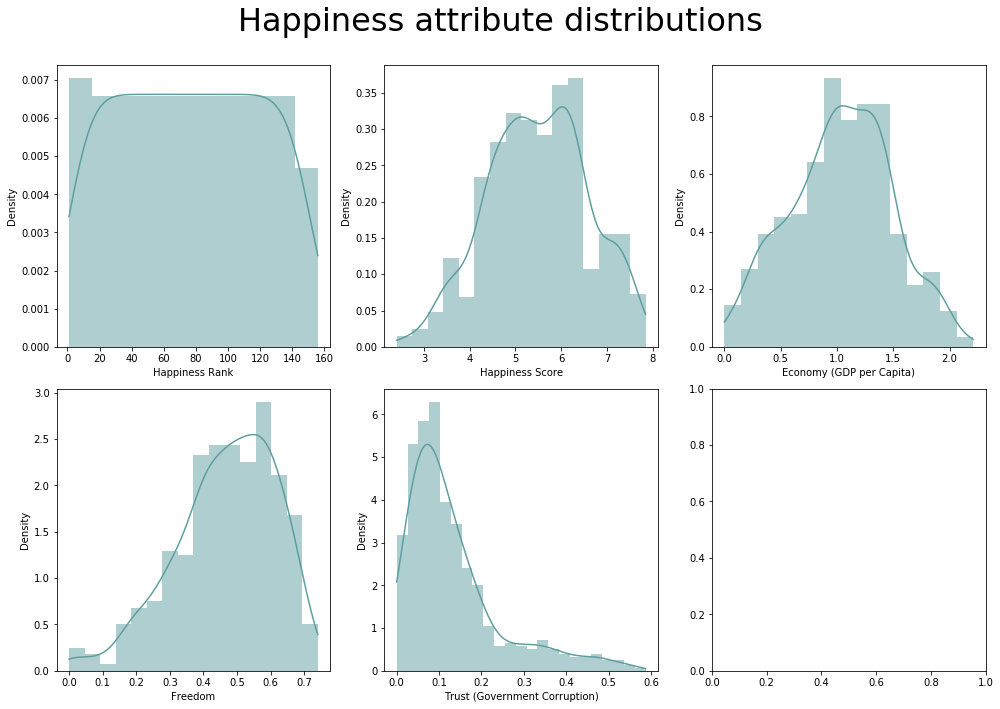

In [33]:
happiness_quant = happiness[['Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Freedom', 'Trust (Government Corruption)']]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 10))
for i, column in enumerate(happiness_quant.columns):
    sns.histplot(happiness_quant[column], ax=axes[i//3,i%3], kde=True, stat="density", linewidth=0, color='cadetblue')
fig.tight_layout()
fig.suptitle('Happiness attribute distributions', fontsize=32)
fig.subplots_adjust(top=0.9)
plt.show()

We can see above that the `Happiness Ranks` are pretty uniform, merely because these compile data across the years, and the numbers are all ranked integers. Next, we can see that the `Happiness Score` and `Economy` numbers are close to being normally distributed. `Happiness Score` has a slight dip, demonstrating a bimodal distribution with a slight left skew. This shows that although most countries are on the happier side, there are still a significant amount of countries who are on the other side of the mean, with a more negative happiness score.  

The two quantitative variables with the most skewed data are `Freedom` and `Trust`. The `Freedom` distribution is skewed left, with a significant amount of the countries having high freedom levels. However, there are outliers on the left, demonstrating still a significant amount of countries with absolutely no freedom. Conversely, the `Trust` distribution is skewed right, with a significant amount of countries having low trust in their governments, indicating high global government corruption numbers. This demonstrates that although there are very "free" countries, most global citizens do not trust their governments.

The relationship between `Freedom` and COVID measures is an interesting feature that we look to examine later in this notebook.

First, we want to continue exploring the `happiness` dataset and look at the correlations between the quantiative variables.

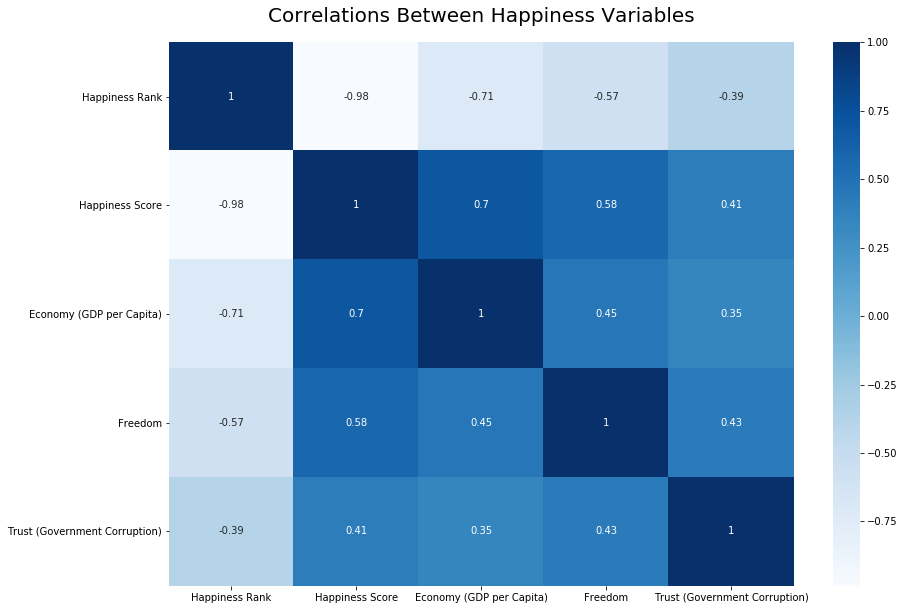

In [34]:
fig, axes = plt.subplots(figsize=(14, 10))
sns.heatmap(happiness_quant.corr(), annot=True, cmap='Blues')
plt.yticks(rotation=0)
b, t = plt.ylim()
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.title('Correlations Between Happiness Variables', fontsize=20, pad=20)
plt.show()

Here, we can see that there are higher correlations between `Economy` and `Happiness Score`, as well as `Happiness Score` and `Freedom`. Conversely, there's a weaker correlation between `Economy` and `Trust`. These are all relationships that we will examine further in our analysis through the intersection with other COVID statistics.

### Comparing Lockdowns and Degrees of Freedom 

The first relationship that we want to compare is country lockdowns vs. the level of freedom measured in our `Happiness` dataset. 

Since most lockdowns were in 2020, we wanted to constrain our data to just 2020: the start of the pandemic. 

In [35]:
# create separate datasets for different types of lockdowns
full = covid[covid['Type'] == 'Full']
partial = covid[covid['Type'] == 'Partial']
year2020 = happiness[happiness['Year'] == 2020]

# merge happiness values with lockdown values
full2020 = pd.merge(year2020, full, on='Country')
partial2020 = pd.merge(year2020, partial, on='Country')

Now that we have segregated the full and partial lockdown countries, we can proceed with comparing the two variables.

Text(0.5, 1.0, 'Distribution of Freedom Measures Grouped By Type of Lockdown')

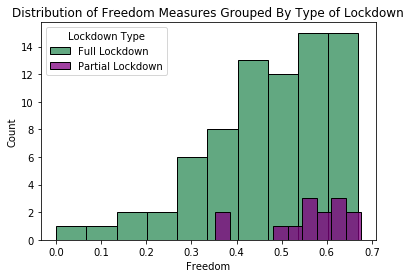

In [36]:
ax2 = sns.histplot(full2020['Freedom'], bins=10, color='seagreen')
ax2 = sns.histplot(partial2020['Freedom'], bins=10, color='purple')
ax2.legend(labels=['Full Lockdown', 'Partial Lockdown'], title='Lockdown Type')
ax2.set_title('Distribution of Freedom Measures Grouped By Type of Lockdown')

The data for full lockdown shows a significant negative skew, with most countries having high freedom scores. However, there are a few countries listed with very, very low freedom levels. For the partial lockdown data, the degrees of freedom are also skewed left, but appear to generally be higher than full lockdown. There are a few gaps in the data that we could explore!

In [37]:
# see which countries have lower freedom scores amongst partial lockdowns
partial2020.loc[partial2020['Freedom'] < 0.5, 'Country']

10    croatia
11    senegal
13    georgia
Name: Country, dtype: object

From above, we can see that there are three countries— Croatia, Senegal, and Georgia— whose freedom scores are on the lowest end of partial-lockdown countries.

Similar to what was previously done, it would be interesting to explore which full-lockdown countries are at the lower end of freedom scores in the graph.

In [38]:
# see which countries have lower freedom scores amongst full lockdowns
full2020.loc[full2020['Freedom'] < 0.1, 'Country']

55        algeria
74    afghanistan
Name: Country, dtype: object

Here, we can see that both Algeria and Afghanistan had full lockdowns, and their freedom scores are both lower than 0.1. There is some consideration that there may be missing countries in this dataset. This may be the result of some countries not having access to Twitter, meaning those countries were removed when joining the `tweets` dataset with the rest of the `covid` datset.

Before proceeding with further analysis, we want to look at the descriptive statistics of both the full and partial lockdown datasets. 

In [39]:
full2020['Freedom'].describe()

count    75.000000
mean      0.477278
std       0.142164
min       0.000000
25%       0.400591
50%       0.513210
75%       0.588838
max       0.670201
Name: Freedom, dtype: float64

In [40]:
partial2020['Freedom'].describe()

count    14.000000
mean      0.558172
std       0.095251
min       0.352401
25%       0.539429
50%       0.571895
75%       0.621906
max       0.674940
Name: Freedom, dtype: float64

We can see that the maximum values for both datasets are very close, but the minimum values are very different. This may be attributed to the significant difference in sample size, since there are 14 partial lockdown countries and 75 full lockdown countries. Overall, we cannot assume causation from the lockdown measures. However, lockdown measures do appear to align with freedom levels, with partial lockdowns showing higher freedom distributions than full lockdowns.

Next, we want to proceed with comparing Happiness vs. Lockdown Measures.

### Comparing Happiness and Lockdown Measures

Next, we were interested in comparing the severity of lockdown measures and the happiness scores of the respective countries. Similar to the previous analysis, because most lockdown measures were implemented in 2020, we want to constrain the data to just 2020. 

Text(0.5, 1.0, 'Distribution of Happiness Scores Grouped By Type of Lockdown')

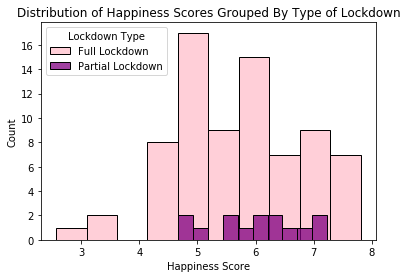

In [41]:
ax = sns.histplot(full2020['Happiness Score'], bins=10, color='pink')
ax = sns.histplot(partial2020['Happiness Score'], bins=10, color='purple')
ax.legend(labels=['Full Lockdown', 'Partial Lockdown'], title='Lockdown Type')
ax.set_title('Distribution of Happiness Scores Grouped By Type of Lockdown')

From the graph above, it is evident that for partial lockdowns, we have a multimodal distribution, with a generally smaller range of happiness scores for partial lockdowns. Conversely, the range appears to be much larger for the full lockdown, with quite a few countries at the bottom of the list. It would be interesting to see which countries are at the bottom!

In [42]:
# full lockdown countries with the lowest happiness scores
full2020.loc[full2020['Happiness Score'] < 4, 'Country']

72          india
73         rwanda
74    afghanistan
Name: Country, dtype: object

As we can see above, India, Rwanda, and Afghanistan all implemented full lockdowns and also had the lowest happiness scores of the countries that implemented full lockdowns. It is interesting to see Afghanistan at the bottom of the list for both happiness scores and freedom scores. Again, it does appear that there may be countries missing from this list.

In the graph, we saw that the partial lockdowns had a much smaller range of happiness scores, while full lockdowns had larger ranges. We will explore that more by looking into the distributions of the `Happiness Scores` of each dataset.

In [43]:
# describe the partial lockdown dataset
partial2020['Happiness Score'].describe()

count    14.000000
mean      6.013600
std       0.824176
min       4.672600
25%       5.551550
50%       6.002400
75%       6.443025
max       7.232100
Name: Happiness Score, dtype: float64

From above, we can see that just 14 countries implemented a partial lockdown, and the average happiness scores were around a 6. The data is not too skewed, as the median is also at 6. Next, we can do the same for the `full lockdown` dataset.

In [44]:
#describe the full lockdown dataset
full2020['Happiness Score'].describe()

count    75.000000
mean      5.723735
std       1.088459
min       2.566900
25%       4.943900
50%       5.747500
75%       6.403700
max       7.808700
Name: Happiness Score, dtype: float64

Here, we can see that there is, in fact, a greater range of happiness scores. Again, this can be attributed to the significant difference in sample size for full vs. partial lockdown countries. 

All of this data does show us that, in general, the happiness scores of countries who underwent partial lockdowns were higher, on average, than countries who underwent full lockdowns. Of course, there are confounding variables in this, such as the fact that the lockdowns were a reaction to a global pandemic breaking out. Hence, it would be inappropriate to imply causation between lockdown measures and happiness levels.

### Comparing Happiness Scores, Freedom Scores, and Lockdown Measures

Before we move on from analyzing the relationship between lockdown measures and freedom scores/happiness scores, we would like to compare all three of the variables together. First, we want to join all the countries' 2020 lockdown data with the `happiness` data in one dataset.

In [45]:
# merge previous year2020 dataframe with covid dataframe
countries_2020 = pd.merge(year2020, covid, on='Country')
countries_2020.head()

,index,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Freedom,Trust (Government Corruption),Year,aggregate_tweets,daily_vaccinations_per_million,people_fully_vaccinated,people_vaccinated_per_hundred,total_vaccinations,total_vaccinations_per_hundred,Date,Type
0,781,finland,Western Europe,1,7.8087,1.285190,0.662317,0.477857,2020,32,178591.0,4292022.0,493.16,32119724.0,579.71,2020-03-27,Full
1,782,denmark,Western Europe,2,7.6456,1.326949,0.665040,0.495260,2020,27,192354.0,14328571.0,553.37,46383637.0,800.81,2020-03-11,Full
2,783,switzerland,Western Europe,3,7.5599,1.390774,0.628954,0.407946,2020,98,147153.0,15587887.0,348.89,53263549.0,615.48,2020-03-18,Full
3,785,norway,Western Europe,5,7.4880,1.424207,0.670201,0.434101,2020,21,170265.0,10296620.0,445.47,34447121.0,635.39,2020-03-12,Full
4,786,netherlands,Western Europe,6,7.4489,1.338946,0.613626,0.368570,2020,244,129040.0,2987541.0,54.09,12256285.0,71.52,2020-03-24,Full


Now that we have our complete 2020 happiness and covid dataframe, we can compare the three data values analyzed in the previous two sections.

Text(0.5, 1.0, 'Comparing Happiness Scores and Freedom Scores')

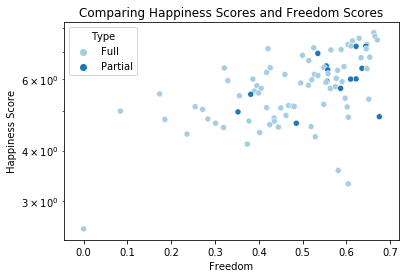

In [46]:
ax = sns.scatterplot(x=countries_2020['Freedom'], y=countries_2020['Happiness Score'], hue=countries_2020['Type'], palette='Paired')

# scale the y-axis to log scale
ax.set(yscale='log')
ax.set_title('Comparing Happiness Scores and Freedom Scores')

The scatterplot above shows a slight positive relationship between `Happiness Score` and `Freedom`, and most partial-lockdown countries are found on the top right corner. Interestingly, there is one extreme value at the very corner.

In [47]:
# find the extreme value
countries_2020.loc[countries_2020['Freedom'] == 0, 'Country']

88    afghanistan
Name: Country, dtype: object

Here, we can see that as similar to the previous two sections, Afghanistan is on the bottom of the list in terms of Freedom and Happiness Score. 

Seeing the very lackluster relationship between the two variables in the scatterplot, we want to further analyze the relationship between Freedom and Happiness Score.

In [48]:
# ordinary least squares model
outcome, predictors = patsy.dmatrices('Q("Happiness Score") ~ Freedom', countries_2020)
freedom_model = sm.OLS(outcome, predictors)
results = freedom_model.fit()
print(results.summary())

                             OLS Regression Results                             
Dep. Variable:     Q("Happiness Score")   R-squared:                       0.303
Model:                              OLS   Adj. R-squared:                  0.295
Method:                   Least Squares   F-statistic:                     37.83
Date:                  Fri, 03 Jun 2022   Prob (F-statistic):           2.28e-08
Time:                          03:04:43   Log-Likelihood:                -114.27
No. Observations:                    89   AIC:                             232.5
Df Residuals:                        87   BIC:                             237.5
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.7209      0.346

Based on the results from this OLS regression, the relationship between `Happiness Scores` and `Freedom` is positive, but very weak. Our p-value is estimated to be 0, which means that the differences between the groups are significant and we can reject the null hypothesis. 

Now, we want to move on to comparing happiness score vs. country vaccination status.

### Comparing Happiness and Country Vaccination Status 

To compare happiness and country vaccination status, we first look at the countries who have the largest and smallest total number of vaccinations. To do this, we used the `vaccinations` dataset and used `total_vaccinations` as our variable. Then we narrowed in on the top 10 and bottom 10 countries.

Text(0.5, 0, 'Total Number of Vaccinations')

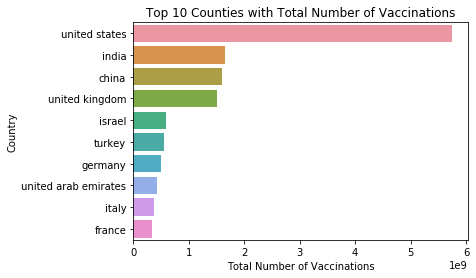

In [49]:
covid = covid.sort_values(['total_vaccinations'], ascending = False)
sns.set_palette("YlGnBu")
ax = sns.barplot(y = covid['Country'].head(10),x = covid['total_vaccinations'].head(10))

ax.set_title('Top 10 Counties with Total Number of Vaccinations')
ax.set_xlabel('Total Number of Vaccinations')

From this visualization, we can see that the `United States` has a much larger number of total vaccinations compared to other countries. 

Additionally the x-axis uses a scientific notation scale with a standard value of `1e9`. This is because these countries have vaccination totals in the millions.

Text(0.5, 0, 'Total Number of Vaccinations')

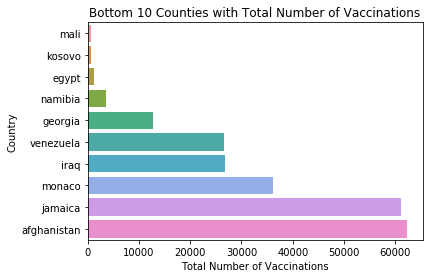

In [50]:
covid = covid.sort_values(['total_vaccinations'], ascending = True)
sns.set_palette("YlGnBu")
ax = sns.barplot(y = covid['Country'].head(10),x = covid['total_vaccinations'].head(10))

ax.set_title('Bottom 10 Counties with Total Number of Vaccinations')
ax.set_xlabel('Total Number of Vaccinations')

Next, we utilized a scatterplot to compare the `total number of vaccinations` a country has to their `Happiness Score`.  

In [51]:
#Merging our vaccination data (covid dataframe) with happiness data from the year 2020
vaccine2020 = pd.merge(year2020, covid, on='Country')

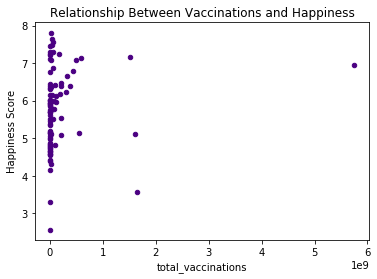

In [52]:
ax1 = vaccine2020.plot.scatter(x = 'total_vaccinations',
                            y = 'Happiness Score', 
                            color = 'indigo',
                            title='Relationship Between Vaccinations and Happiness')

From this scatterplot, we can see that countries with a significantly larger amount `total vaccinations` don't necessarily have the highest `Happiness Score`. However, this visualization also shows us that many countries have less than `1le9` in terms of their amount of total vaccinations.

Additionally the x-axis uses a scientific notation scale with a standard value of `1e9`. This is because these countries have vaccination totals in the millions.

To get a better visualization of these other countries, and to resolve outlier issues that we have from the above scatterplot, we used a linear transformation.

Text(0.5, 1, 'Relationship between Total Vaccinations and \n Happiness Scores of Countries in 2020')

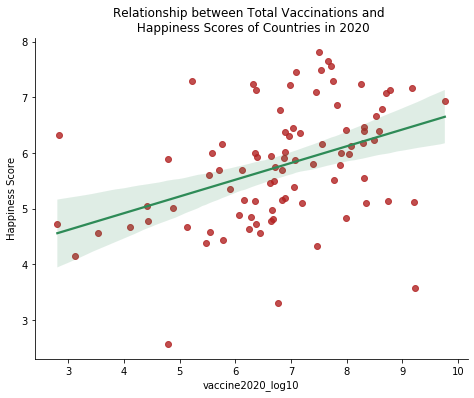

In [53]:
# log transforming vaccination data
vaccine2020['vaccine2020_log10'] = np.log10(vaccine2020['total_vaccinations'] + 0.1)

sns.lmplot(
    x = 'vaccine2020_log10',
    y = 'Happiness Score',
    data = vaccine2020,
    aspect = 1.3,
    scatter_kws={"color": "firebrick"},
    line_kws = {'color': 'seagreen'}
)

ax = plt.gca()
ax 
ax.set_title('Relationship between Total Vaccinations and \n Happiness Scores of Countries in 2020')

Based on this visualization, we can see that there is a slight positive relationship between `Happiness Scores` and the `Total Number of Vaccinations` a country has. To further look into this relationship, we used an OLS Regression.

In [54]:
# ordinary least squares model
outcome, predictors = patsy.dmatrices('Q("Happiness Score") ~ vaccine2020_log10', vaccine2020)
vaccine_model = sm.OLS(outcome, predictors)
results = vaccine_model.fit()
print(results.summary())

                             OLS Regression Results                             
Dep. Variable:     Q("Happiness Score")   R-squared:                       0.171
Model:                              OLS   Adj. R-squared:                  0.162
Method:                   Least Squares   F-statistic:                     17.98
Date:                  Fri, 03 Jun 2022   Prob (F-statistic):           5.55e-05
Time:                          03:04:45   Log-Likelihood:                -121.98
No. Observations:                    89   AIC:                             248.0
Df Residuals:                        87   BIC:                             252.9
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         

Based on our chart, the relationship between `Happiness Scores` and `Total Number of Vaccinations` is positive but somewhat weak. Our p-value is estimated to be around zero which helps us understand that our data has a slim possibility of being created by chance alone. However, our R-squared value is `0.171` which means our model accounts for about 17.1% of variation in our data. This is a very small percentage which means more research and analyis needs to be done to truly compare the relationship between happiness and the total number of vaccinations in countries.  

### Comparing Happiness and COVID-19 Tweets

We want to start off by looking at the data from the `tweets` dataframe. We have just one quantitative variable: `aggregate_tweets`, which we will visualize below.

Text(0.5, 0, 'Number of Aggregate Tweets')

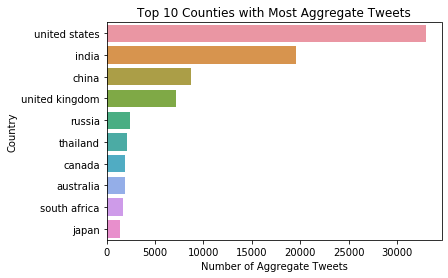

In [55]:
covid = covid.sort_values(['aggregate_tweets'], ascending=False)
sns.set_palette("Greens_d")
ax = sns.barplot(y=covid['Country'].head(10), x=covid['aggregate_tweets'].head(10))

ax.set_title('Top 10 Counties with Most Aggregate Tweets')
ax.set_xlabel('Number of Aggregate Tweets')

As expected, the United States, India, and China lead the pack in terms of aggregate tweets related to COVID. This is reasonable because they have the top three populations in the world (circa 2020).

We would like to first examine the relationship between happiness and number of COVID tweets.

Text(0.5, 1, 'Relationship between COVID Tweets and Happiness Scores in 2020')

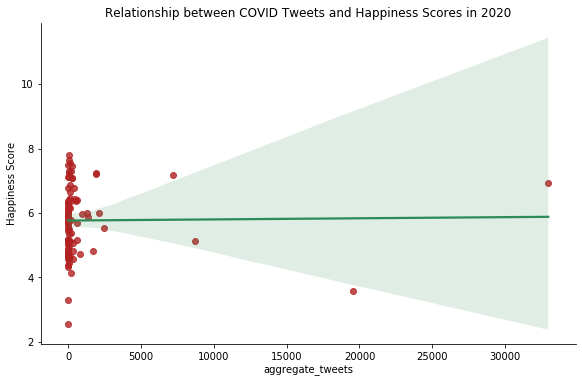

In [56]:
# merge covid dataframe with tweets + happiness dataframe for 2020
year2020 = happiness[happiness['Year'] == 2020]
happiness2020 = pd.merge(year2020, covid, on='Country')

happiness2020['aggregate_tweets'] = happiness2020['aggregate_tweets'].astype(float)

sns.lmplot(
    x = 'aggregate_tweets',
    y = 'Happiness Score',
    data = happiness2020,
    aspect = 1.6,
    scatter_kws={"color": "firebrick"},
    line_kws={"color": "seagreen"}
)
ax = plt.gca()
ax.set_title('Relationship between COVID Tweets and Happiness Scores in 2020')


What we can see here is that there is a very, very slight positive relationship, with a few outliers. Most of our data, however, is skewed around zero tweets. Hence, we will use a linear transformation to prevent the outliers from driving our relationship.

Text(0.5, 1, 'Relationship between transformed COVID Tweets and Happiness Scores in 2020')

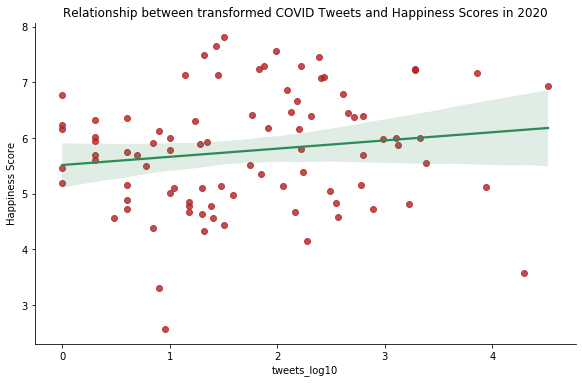

In [57]:
# log transform
happiness2020['tweets_log10'] = np.log10(happiness2020['aggregate_tweets'])

# visualize the relationship between the log10 tweets and Happiness Scores
sns.lmplot(
    x = 'tweets_log10',
    y = 'Happiness Score',
    data = happiness2020,
    aspect = 1.6,
    scatter_kws={"color": "firebrick"},
    line_kws={"color": "seagreen"}
)
ax = plt.gca()
ax.set_title('Relationship between transformed COVID Tweets and Happiness Scores in 2020')

In [58]:
# ordinary least squares model
tweets_outcome, tweets_predictors = patsy.dmatrices('Q("Happiness Score") ~ tweets_log10', happiness2020)
tweets_model = sm.OLS(tweets_outcome, tweets_predictors)
tweets_results = tweets_model.fit()
print(tweets_results.summary())

                             OLS Regression Results                             
Dep. Variable:     Q("Happiness Score")   R-squared:                       0.022
Model:                              OLS   Adj. R-squared:                  0.011
Method:                   Least Squares   F-statistic:                     1.946
Date:                  Fri, 03 Jun 2022   Prob (F-statistic):              0.167
Time:                          03:04:47   Log-Likelihood:                -129.36
No. Observations:                    89   AIC:                             262.7
Df Residuals:                        87   BIC:                             267.7
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        5.5149     

In the graph, we can see a very, very weak relationship between number of COVID-related tweets and the happiness scores of the residents. The OLS Regression results show that there is a very small effect on happiness score per every increase in tweets based on our $\beta_1$ estimate of `0.02321`, or, `0.0002321` considering the log transformation. This fails to take into account counfounding variables such as the sentiment of the tweets. Or, if the tweets were positive or negative. Therefore, further explorations must be conducted in the scope of the tweets and the happiness scores per global country.

Next, we want to proceed with conducting sentiment analysis on the `tweets` dataset to further allow for better comparison between happiness and the incidence of covid-related tweets.

### Sentiment Analysis of Tweets

Before indulging in subsequent exploratory data analysis, we would like to conduct a twitter sentiment analysis to evaluate the sentiment of the tweets. However, since our final `covid` dataset only includes the value counts for the tweets, we will resort to using the original `tweets` dataset that included the text of the tweets.

First, we want to check on the `tweets` dataframe.

In [59]:
tweets.head()

,user_name,location,date,text
0,Tom Basile 🇺🇸,united states,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...
1,Time4fisticuffs,china,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...
2,hr bartender,united states,2020-07-25 12:27:03,How #COVID19 Will Change Work in General (and ...
3,Creativegms,china,2020-07-25 12:26:50,Order here: https://t.co/4NUrGX6EmA\n\n#logo #...
4,DailyaddaaNews,india,2020-07-25 12:26:46,Rajasthan Government today started a Plasma Ba...


Next, we want to begin with preprocessing the text. We will do it in two parts. First, we want to remove punctuation, links, and words with numbers. For uniformity, we will lowercase all the words in the text.

In [60]:
def clean_text(text):
    text = text.lower()
    text = re.sub('https?://\S+|www\.\S+', ' ', text) #remove urls
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text) #remove words containing numbers
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) #remove punctuation from strings
    return text

In [61]:
tweets['text'] = tweets['text'].apply(lambda x: clean_text(x))
tweets['text']

0         hey yankees yankeespr and mlb  wouldnt it have...
1          wdunlap realdonaldtrump trump never once clai...
2         how  will change work in general and recruitin...
3         order here  logo graphicdesigner logodesign lo...
4         rajasthan government today started a plasma ba...
                                ...                        
101193    wallkill school nurse adds covid monitoring to...
101194    wallkill school nurse adds covid monitoring to...
101195    thanks iamohmai for nominating me for the who ...
101196                          the year of insanity lol   
101197    i stop when i see a stopsabcnewsdailysunsaenca...
Name: text, Length: 101198, dtype: object

Now that we have cleaned up the text a bit, we want to move on to cleaning up the various types of emojis that may appear in a tweet. 

In [62]:
# remove emojis 
# source: https://stackoverflow.com/questions/33404752/removing-emojis-from-a-string-in-python

def remove_emoji(text):
    emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                            "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [63]:
tweets['text'] = tweets['text'].apply(lambda x: remove_emoji(x))
tweets['text']

0         hey yankees yankeespr and mlb  wouldnt it have...
1          wdunlap realdonaldtrump trump never once clai...
2         how  will change work in general and recruitin...
3         order here  logo graphicdesigner logodesign lo...
4         rajasthan government today started a plasma ba...
                                ...                        
101193    wallkill school nurse adds covid monitoring to...
101194    wallkill school nurse adds covid monitoring to...
101195    thanks iamohmai for nominating me for the who ...
101196                          the year of insanity lol   
101197    i stop when i see a stopsabcnewsdailysunsaenca...
Name: text, Length: 101198, dtype: object

Our final process in the preprocessing stage of the sentiment analysis is to remove stop words. Stop words are the words that are most abundant in our language, and by removing them, we can focus on the more unique and more significant phrases mentioned in the tweets.

In [64]:
#remove stopwords

stop_words = set(stopwords.words('english'))
remove_words = lambda x: ' '.join([word for word in x.split() if word not in stop_words])

tweets['text'] = r = tweets['text'].apply(remove_words)
tweets['text']

0         hey yankees yankeespr mlb wouldnt made sense p...
1         wdunlap realdonaldtrump trump never claimed ho...
2         change work general recruiting specifically vi...
3         order logo graphicdesigner logodesign logodesi...
4         rajasthan government today started plasma bank...
                                ...                        
101193    wallkill school nurse adds covid monitoring da...
101194    wallkill school nurse adds covid monitoring da...
101195    thanks iamohmai nominating wearamask challenge...
101196                                    year insanity lol
101197    stop see stopsabcnewsdailysunsaencaaliwalnorth...
Name: text, Length: 101198, dtype: object

Now that we preprocessed the text that will be used in our subsequent sentiment analysis, we will check on the state of our `tweets['text']` data.

In [65]:
tweets['text']

0         hey yankees yankeespr mlb wouldnt made sense p...
1         wdunlap realdonaldtrump trump never claimed ho...
2         change work general recruiting specifically vi...
3         order logo graphicdesigner logodesign logodesi...
4         rajasthan government today started plasma bank...
                                ...                        
101193    wallkill school nurse adds covid monitoring da...
101194    wallkill school nurse adds covid monitoring da...
101195    thanks iamohmai nominating wearamask challenge...
101196                                    year insanity lol
101197    stop see stopsabcnewsdailysunsaencaaliwalnorth...
Name: text, Length: 101198, dtype: object

Now, we will conduct a sentiment analysis of the text in order to detect the polarity within the text. In this analysis, we'll be using VADER's `SentimentIntensityAnalyzer()`, which, in addition to detecting the polarity of the text, can also detect the intensity of the emotion. Because our `tweets` dataset is unlabeled, this is an optimal model as it can be applied to unlabeled text data. 

"Towards Data Science"'s article on VADER's `SentimentIntensityAnalyzer()` goes further into depth on the mechanisms of VADER's text analysis and was a source used to complete the analysis of our `tweets` dataset. The linked article provides great detail about the steps and processes used: https://towardsdatascience.com/sentimental-analysis-using-vader-a3415fef7664. 

In [66]:
sid = SentimentIntensityAnalyzer()

# function that analyzes the inputs and returns a dictionary of scores
scores = lambda x: sid.polarity_scores(x)
sentiment_scores = tweets['text'].apply(scores)
sentiment_scores

0         {'neg': 0.11, 'neu': 0.709, 'pos': 0.181, 'com...
1         {'neg': 0.0, 'neu': 0.815, 'pos': 0.185, 'comp...
2         {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
3         {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
4         {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
                                ...                        
101193    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
101194    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
101195    {'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'comp...
101196    {'neg': 0.493, 'neu': 0.133, 'pos': 0.373, 'co...
101197    {'neg': 0.524, 'neu': 0.476, 'pos': 0.0, 'comp...
Name: text, Length: 101198, dtype: object

From above, we can see that all the invidual tweets have been scored using VADER and placed into four categories: negative, neutral, positive, and compound, which is computed by normalizing the aforementioned categories. Now, we want to clean up the data so that it can be merged back into our `tweets` dataset.

We want to first put the list of scores in a new `sentiment` dataset.

In [67]:
# new dataframe containing list of sentiment scores
sentiment = pd.DataFrame(data=list(sentiment_scores))
sentiment.head()

,neg,neu,pos,compound
0,0.11,0.709,0.181,0.2263
1,0.00,0.815,0.185,0.2057
2,0.00,1.000,0.000,0.0000
3,0.00,1.000,0.000,0.0000
4,0.00,1.000,0.000,0.0000


Next, we want to use the `compound` score, which is found by normalizing the other three categories, to label the polarity of the tweet. Compound values that are greater than zero are positive and compound values that are less than zero are negative. This means that compound values that are equal to zero will be considered neutral tweets.

In [68]:
# function determining the labels based on compound score
label = lambda x: 'neutral' if x==0 else ('positive' if x>0 else 'negative')

# place in a new column: label
sentiment['label'] = sentiment['compound'].apply(label)
sentiment.head()

,neg,neu,pos,compound,label
0,0.11,0.709,0.181,0.2263,positive
1,0.00,0.815,0.185,0.2057,positive
2,0.00,1.000,0.000,0.0000,neutral
3,0.00,1.000,0.000,0.0000,neutral
4,0.00,1.000,0.000,0.0000,neutral


Finally, we have determined the polarity of the tweets and can merge the labels with their respective tweets. 

In [69]:
# add label and compound column to the tweets dataframe
tweets = tweets.join(sentiment[['compound', 'label']])
tweets.head()

,user_name,location,date,text,compound,label
0,Tom Basile 🇺🇸,united states,2020-07-25 12:27:17,hey yankees yankeespr mlb wouldnt made sense p...,0.2263,positive
1,Time4fisticuffs,china,2020-07-25 12:27:14,wdunlap realdonaldtrump trump never claimed ho...,0.2057,positive
2,hr bartender,united states,2020-07-25 12:27:03,change work general recruiting specifically vi...,0.0000,neutral
3,Creativegms,china,2020-07-25 12:26:50,order logo graphicdesigner logodesign logodesi...,0.0000,neutral
4,DailyaddaaNews,india,2020-07-25 12:26:46,rajasthan government today started plasma bank...,0.0000,neutral


Now that we have our text analysis of the `tweets` dataset, we can reiterate the Happiness Score vs. Tweets comparison with a more in-depth understanding of the polarity of the tweets.

First, we want to analyze the resultant sentiment of the corpus of tweets.

In [70]:
tweets['label'].value_counts()

positive    40107
neutral     36060
negative    25031
Name: label, dtype: int64

Shockingly, we can see using `value_counts()` that most of the COVID-19 tweets documented appear to be positive, with the next largest category being neutral tweets. We want to further examine the relationship between the polarity of tweets and the happiness scores of the countries that they come from.

In order to better compare `tweet sentiment` and `happiness score`, we will use the `compound` score and average that for each country in order to have a quantifiable evaluation of the overall sentiment of tweets associated with each country.

In [71]:
# find the average compound scores of tweets for each country
countries_sentiment = tweets.groupby('location')
countries_sentiment = countries_sentiment['compound'].mean()
countries_sentiment.head()

location
afghanistan    0.208333
albania       -0.336400
algeria        0.045320
angola        -0.000071
argentina      0.048514
Name: compound, dtype: float64

In [72]:
# put average scores in a new data frame
countries_sentiment_df = pd.DataFrame(data=list(countries_sentiment))
countries_sentiment_df.columns = ['sentiment']
covid = covid.sort_values(by=['Country'], ascending=True)

# merge sentiment scores with existing covid dataframe
covid = covid.join(countries_sentiment_df['sentiment'])
covid.head()

,Country,aggregate_tweets,daily_vaccinations_per_million,people_fully_vaccinated,people_vaccinated_per_hundred,total_vaccinations,total_vaccinations_per_hundred,Date,Type,sentiment
0,afghanistan,9,1277.0,0.0,0.16,62200.0,0.16,2020-03-24,Full,0.208333
1,albania,4,41108.0,2316.0,0.50,1143532.0,39.75,2020-03-08,Full,-0.336400
2,algeria,10,1568.0,0.0,0.00,75030.0,0.17,2020-03-24,Full,0.045320
3,argentina,964,86900.0,23035286.0,188.14,108616678.0,240.34,2020-03-20,Full,-0.000071
4,australia,1898,25411.0,0.0,4.86,9785319.0,38.39,2020-03-25,Partial,0.048514


Now that we have our complete `covid` dataframe with updated "average sentiment scores" for each country, we can once again examine the relationship between `happiness scores` and `tweets`.

We will begin by first examining the top 10 countries with positive tweets. This is to get a general idea of which countries are outputting the "happiest" COVID-related tweets.

Text(0.5, 0, 'Count of Positive Tweets')

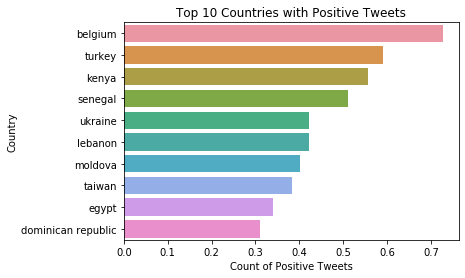

In [73]:
covid = covid.sort_values(['sentiment'], ascending=False)
ax = sns.barplot(y=covid['Country'].head(10), x=covid['sentiment'].head(10))

ax.set_title('Top 10 Countries with Positive Tweets')
ax.set_xlabel('Count of Positive Tweets')

From the graph above, we can see that the top countries with positive tweets are not shockingly the most populous countries in the world. It would be interesting to see what the top countries are sorted by happiness scores. 

Text(0.5, 0, 'Happiness Score')

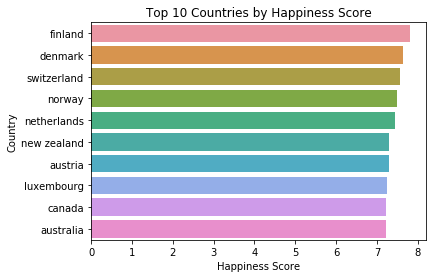

In [76]:
happiness = happiness.sort_values(['Happiness Score'], ascending=False)
ax = sns.barplot(y=happiness2020['Country'].head(10), x=happiness2020['Happiness Score'].head(10))

ax.set_title('Top 10 Countries by Happiness Score')
ax.set_xlabel('Happiness Score')

As we can see above, the top countries by happiness score does diverge from the top countries by tweet sentiment. Regardless, we can further explore the relationship of the two values using an `lmplot`.

Text(0.5, 1, 'Relationship between sentiment of COVID tweets and Happiness Scores in 2020')

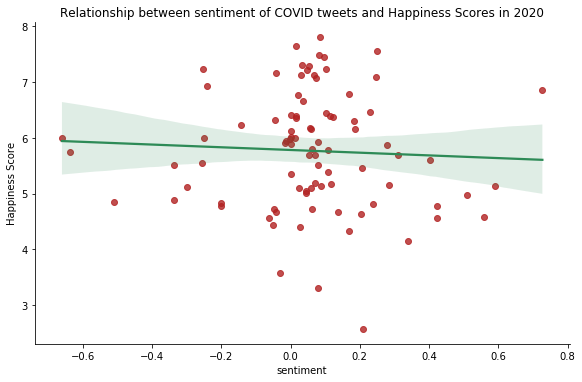

In [74]:
# merge the new and updated covid dataset with 2020 happiness data
sentiment2020 = pd.merge(year2020, covid, on='Country')

sns.lmplot(
    x = 'sentiment',
    y = 'Happiness Score',
    data = sentiment2020,
    aspect = 1.6,
    scatter_kws={"color": "firebrick"},
    line_kws={"color": "seagreen"}
)
ax = plt.gca()
ax.set_title("Relationship between sentiment of COVID tweets and Happiness Scores in 2020")

Based on this visualization, we can expect to see no correlation between the average sentiment of tweets and the happiness score of their respective countries. Regardless, we will proceed with an OLS Regression to confirm our expectations. 

In [75]:
sentiment_outcome, sentiment_predictors = patsy.dmatrices('Q("Happiness Score") ~ sentiment', sentiment2020)
sentiment_model = sm.OLS(sentiment_outcome, sentiment_predictors)
sentiment_results = sentiment_model.fit()
print(sentiment_results.summary())

                             OLS Regression Results                             
Dep. Variable:     Q("Happiness Score")   R-squared:                       0.003
Model:                              OLS   Adj. R-squared:                 -0.009
Method:                   Least Squares   F-statistic:                    0.2397
Date:                  Fri, 03 Jun 2022   Prob (F-statistic):              0.626
Time:                          03:05:11   Log-Likelihood:                -130.22
No. Observations:                    89   AIC:                             264.4
Df Residuals:                        87   BIC:                             269.4
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7831      0.116

Based on the results from this OLS regression, the relationship between `tweet sentiment` and `Happiness Score` is slightly negative. The p-score is 0.626, which is significantly above the threshold of 0.05. This means that we cannot reject the null hypothesis and we can conclude that there is no relationship between `tweet sentiment` and `Happiness Score`.

Our analysis underwent a thorough evaluation of the various possible values that may influence a country's Happiness Score. We inevitably were unable to determine a significant relationship between `Happiness Score` and `Tweets` or between `Happiness Score` and `Sentiment of Tweets`. However, our analyses of `Lockdown Type`, `Freedom`, and `Vaccine` datasets show that there is still potential for further analysis surrounding their association with a country's `Happiness Score`.

# Ethics & Privacy

The question we have decided to research involves happiness-- which is a very subjective variable that varies between every individual and their certain capacities. Happiness can also be relatively private and personal which can have internal and external factors that may affect this score. We acknowledge that using the World Happiness Report is confined to whomever participated in the convention census thus not having a holistic view on every individual in their respective countries.

However, with these limitations-- we have cleaned the irrelevant data from the World Happiness dataset and continued to use this dataset since it has one of the most comprehensive and analysis of World Happiness available on Kaggle. We then go on to use these happiness scaling and cross reference them with different effects of COVID-19.

**Permissions**  
We have permission to use these datasets as the data was collected from sources that were made publicly available for people to use. The following datasets can be found on Kaggle which is open for the public: World Happiness Report, COVID19 Tweets, World Cities Dataset, COVID-19 Lockdown dates by country, and COVID19 Country Vaccination Progress. 

**Potential Biases**  
We are using the data COVID19 Tweets; because this data is found on a social media platform-- there is lots of data that may include misinformation, various polarity in perspectives, difference in political preferences, and so on. However, we will clean the data and focus solely on variables such as: location, date, and time of the tweet. 
Additionally, for other datasets-- although there is misinformation on many COVID-19 aspects, we will be measuring individuals’ opinions from a binary lens of “positive” or “negative” and how that affects the happiness rate within the respective location.

Furthermore, other datasets such as: World Cities, COVID-19 Lockdown dates, and COVID-19 Country were collected objectively through official sources and only have quantitative data.

**Conclusion**  
Overall, the data we have collected for our project is available for public use and we have minimized bias through careful analysis and cleaning of the data. 


# Conclusion & Discussion

COVID-19 has had a large affect on people's mental health as shelter in place orders locked people in their homes for weeks without any form of in-person social interaction. We wanted to know if happiness levels were truly affected by COVID-related measures, so our project analyzed the relationship between happiness scores and COVID-related variables such as vaccinations, lockdowns, and COVID-related tweets. The first two COVID-related variables are fairly straightforward, but the idea to use COVID-related tweets was birthed when we spotted an interesting dataset on Kaggle that compiled tweets that had the hashtag, #covid19. This brought into question whether or not tweets were demonstrative of a country's overall happiness.

As we predicted in our hypothesis, countries with partial lockdowns had higher freedom scores than countries with full lockdowns. However, there is a comparatively large difference in sample size between the two variables. In addition, once we identified the countries with the lowest freedom scores, we did question if there were other countries whose data were just not included in the datset. Or, our data cleaning process resulted in the loss of valuable data. Similarly, we saw that the happiness scores of partial-lockdown countries were higher, on average, than full-lockdown countries. Again, there is a significant difference in sample size for both cases. 

When comparing `freedom` and `happiness scores`, we got a p-value of 0, which indicates a significant relationship between the two values. In addition, the R-squared value suggests that 30% of the variance in Happiness Scores is explained by the Freedom Score. Similarly, we got a p-score of 0 when comparing `total vaccinations` with `happiness scores`, which allowed us to accept part of our hypothesis with caution. The uncertainty is due to the fact that the R-squared value indicates that 17.1% of the variance in Happiness Scores is explained by the Total Vaccinations.

Our results begin to diverge from our hypothesis once we begin our multivariate analysis with `COVID-19 Tweets` and `happiness scores`. When we performed an OLS regression with the `value_counts()` of the tweets from each country, we received a resultant p-score of 0.167, which is higher than the threshold of 0.05. The large p-value indicates that there is not a significant relationship between `COVID-19 tweets` and `happiness scores`. However, one limitation in this is that we do not know what the polarity of the tweets are. Therefore, the number of tweets do not fully encapsulate the happiness of the users and further analysis is necessary to determine the polarity of the tweets.

The results from the tweets that underwent sentiment analysis also show that there is not a signficant relationship between the tweets and `happiness scores`. We received a p-score of 0.626 after running an OLS regression with the tweets that underwent sentiment analysis. In addition, we had a very low R-squared value that indicated 17.1% of the variance in Happiness Scores is explained by the tweets' sentiment. 

To summarize, we accept our hypotheses surrounding the affects of `lockdown levels`, `vaccinations`, and `freedom scores` on `happiness scores`. However, we have to reject our expected correlation between `COVID-19 tweets` and `happiness scores`. 

There are limitations to this project that must be considered when evaluating the results. When cleaning the `tweets` dataset, a lot of data was lost in the process due to the fact that users are able to input their own locations. Therefore, if the location did not match any of the country names, abbreviations, city codes, etc. from the `cities` dataset, the tweet would be removed from the dataframe. Similarly, our `lockdown` dataset was fairly limited and it may not be representative of all the countries around the world. This limitation was made clear when we did our analyses involving the `lockdown` data. 

It is clear that even though we involved a lot of COVID-related data in our analysis, there are even more possible analyses that could be done involving the values in our `covid` dataset. If we were to expand on this project in the future, we would love to consider global GDP levels or unemployment percentages as a comparison point for COVID-related data.

# Final Project Video

https://youtu.be/ChPjwA2Kotc

# Team Contributions

**Jonathan Lum**
- Data Cleaning (`vaccinations`)
- Data Analysis 
- Presentation Slides
- Project Timeline

**Chloe Lee**
- Background and Prior Work
- Hypothesis
- Data Cleaning (`lockdown`)
- Data Analysis 

**Vivian Cheung**
- Overview
- Hypothesis
- Data Cleaning (`tweets`)
- Data Analysis + Sentiment Analysis
- Conclusion & Discussion

**Jenna Nguyen**
- Data Cleaning (`happiness`)
- Data Analysis
- Ethics & Privacy
- Final Video Compilation